<a href="https://colab.research.google.com/github/BlueRayzor/keras/blob/master/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import libraries
#!pip install opencv-python
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.common.image_dim_ordering()
#from keras.layers import Merge
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import glob

Using TensorFlow backend.


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Data Reading and Labeling

In [7]:
PATH = os.getcwd()
# Define data path
data_path = '/content/gdrive/My Drive/Deep_Learning/Course/Project/OCT_Dataset'
 
data_dir_list = os.listdir(data_path)
#print(data_dir_list)

img_rows=128
img_cols=128
num_channel=1
num_epoch=2
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)
    

# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 3
label_index=0
img_data_list=[]
img=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        if dataset[0]==  'A':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0] == 'D':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0] == 'N':
            labels[label_index] = 2
        label_index = label_index+1
            #print(dataset[0])


Loaded the images of dataset-AMD14

Loaded the images of dataset-AMD12

Loaded the images of dataset-AMD2

Loaded the images of dataset-AMD10

Loaded the images of dataset-AMD3

Loaded the images of dataset-AMD13

Loaded the images of dataset-AMD15

Loaded the images of dataset-AMD4

Loaded the images of dataset-AMD1

Loaded the images of dataset-AMD11

Loaded the images of dataset-DME12

Loaded the images of dataset-AMD5

Loaded the images of dataset-DME11

Loaded the images of dataset-DME10

Loaded the images of dataset-AMD8

Loaded the images of dataset-AMD7

Loaded the images of dataset-DME13

Loaded the images of dataset-AMD6

Loaded the images of dataset-AMD9

Loaded the images of dataset-DME1

Loaded the images of dataset-DME2

Loaded the images of dataset-DME14

Loaded the images of dataset-DME15

Loaded the images of dataset-DME6

Loaded the images of dataset-DME8

Loaded the images of dataset-DME5

Loaded the images of dataset-DME4

Loaded the images of dataset-DME9

Loaded t

# Preprocessing steps

In [8]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


# Using 'th' for the image_dim_ordering we get accuracy >=0.99 . 
# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs
if num_channel==1:
    if K.common.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1)
        #print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3)
        #print (img_data.shape)

else:
    if K.common.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)


        labels[0:722] = 0
        labels[723:1823] = 1
        labels[1824:3231] = 2
        
        
        X_train.shape
        

        
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing

    def image_to_feature_vector(image, size=(128, 128)):
        # resize the image to a fixed size, then flatten the image into
        # a list of raw pixel intensities
        return cv2.resize(image, size).flatten()

    img_data_list=[]
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten=image_to_feature_vector(input_img,(128,128))
            img_data_list.append(input_img_flatten)

    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    #print (img_data.shape)
    img_data_scaled = preprocessing.scale(img_data)
    #print (img_data_scaled.shape)

    if K.common.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)


    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled
    
    #%%
labels[0:1000]
#%%

(3231, 128, 128)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
# Assigning Labels

# Define the number of classes
num_classes = 3

names = ['AMD','DME','NORMAL']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset with random state=2
X,y = shuffle(img_data,Y, random_state=2)
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)

# Define the model 

In [10]:
# Defining the model 
# Feel free to use CNNs/Dense Networks
model = Sequential()

model.add(Convolution2D(256,nb_row=3, nb_col=3, activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(128, nb_row=3, nb_col=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(64,nb_row=3, nb_col=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(32,nb_row=3, nb_col=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

learning_rate = 0.001
opt = adam(lr=learning_rate)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Viewing model_configuration
model.summary()
#model.get_config()
#model.layers[0].get_config()
#model.layers[0].input_shape
#model.layers[0].output_shape
#model.layers[0].output
#model.layers[0].get_weights()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", input_shape=(128, 128,...)`
  """


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 256)     2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [11]:
# Train and fit wit appropiate batch size, epochs, verbose = 1 and validation set
hist = model.fit(X_train, y_train, batch_size = 8, nb_epoch=20, verbose=1)

# model saving 
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# Save the model in hdf5 file
model.save('/content/gdrive/My Drive/Deep_Learning/Course/Project/saved_models/Oct_model.h5')

# Load the saved model
loaded_model= load_model('/content/gdrive/My Drive/Deep_Learning/Course/Project/saved_models/Oct_model.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
2584/2584 [==============================] - 21s 8ms/step - loss: 0.5634 - accuracy: 0.7457
Epoch 2/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.1517 - accuracy: 0.9454
Epoch 3/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.0630 - accuracy: 0.9764
Epoch 4/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.1023 - accuracy: 0.9636
Epoch 5/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.0518 - accuracy: 0.9803
Epoch 6/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.0113 - accuracy: 0.9954
Epoch 7/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.0420 - accuracy: 0.9865
Epoch 8/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.0453 - accuracy: 0.9876
Epoch 9/20
2584/2584 [==============================] - 15s 6ms/step - loss: 0.0204 - accuracy: 0.9946
Epoch 10/20
2584/2584 [==============================] - 15s 6ms/step - l

In [12]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test,y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

647/647 [==============================] - 2s 3ms/step
Test Loss: 2.1549673768798332e-05
Test accuracy: 1.0


[[3.0855734e-19 1.0000000e+00 1.1370117e-21]
 [6.7806103e-21 1.0000000e+00 8.5730831e-24]
 [4.4346526e-21 1.6590982e-17 1.0000000e+00]
 ...
 [8.0356415e-08 9.9999988e-01 6.2162421e-11]
 [5.6037019e-10 1.3019333e-09 1.0000000e+00]
 [3.8303654e-07 4.8803746e-11 9.9999964e-01]]
[1 1 2 1 2 1 0 0 0 1 0 2 1 2 2 2 1 2 0 2 0 2 2 2 0 2 1 0 1 2 2 2 0 2 2 0 0
 0 0 0 0 2 1 2 0 2 0 0 0 2 1 1 0 1 1 1 0 1 2 2 2 1 0 2 1 0 0 1 1 1 2 0 0 2
 2 1 2 2 1 2 0 2 2 2 0 0 2 0 1 1 2 2 2 2 0 2 1 1 2 1 2 2 0 2 1 1 2 2 0 0 2
 1 2 1 2 2 2 1 1 2 2 1 1 2 0 2 2 0 1 2 0 1 2 2 2 2 0 2 2 1 2 0 1 1 1 1 0 2
 2 1 0 2 1 1 0 1 1 2 2 2 1 1 1 1 2 2 1 0 1 0 1 1 1 2 1 0 1 0 1 0 2 1 1 2 2
 1 2 1 1 1 1 0 2 2 1 2 2 1 1 1 2 2 0 2 1 1 1 2 2 0 0 0 1 2 0 1 2 1 0 2 2 1
 2 2 2 1 2 1 1 0 1 2 2 2 2 0 2 1 1 0 2 0 2 1 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1
 1 2 2 0 1 2 2 2 2 1 2 1 1 2 0 2 1 2 0 1 0 1 0 0 2 1 0 0 1 2 2 0 0 2 1 0 0
 0 2 1 1 1 2 1 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 1 0 0 2 2 2 1 2 2 1 1 2
 0 0 2 2 2 1 2 2 2 2 1 0 2 2 2 2 1 0 1 1 2 2 2 1 

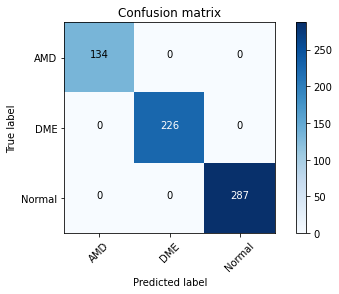

In [13]:
# Predict model on Test Data

Y_pred = model.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred = model.predict_classes(X_test)
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']
                                        
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()